In [178]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [179]:
df1 = pd.read_csv(r"C:\Users\Abu Ubaida\Desktop\Projects\0-NLP\data\emails1.csv")
df2 = pd.read_csv(r"C:\Users\Abu Ubaida\Desktop\Projects\0-NLP\data\emails2.csv")

- First Trying to combine these two datasets

In [180]:
df1.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [181]:
df1.shape
df1.sample(2)
# 2500 ham and 500 spam emails in the dataset.
# 1 = Spam 
# 0 = Not Spam
df1.label.value_counts()

0    2500
1     500
Name: label, dtype: int64

In [182]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [183]:
df1.duplicated().sum()

127

In [184]:
df1 = df1.drop_duplicates()


---
---

In [185]:
df2.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [186]:
df2.shape
# df2.sample(2)
# 0 = not spam 
# 1 = spam

(5736, 2)

In [187]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5736 entries, 0 to 5735
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5730 non-null   object
 1   spam    5728 non-null   object
dtypes: object(2)
memory usage: 89.8+ KB


In [188]:
# is there any weird value
df2.spam.value_counts()

0                                                                                               4359
1                                                                                               1367
 its termination would not  have such a phenomenal impact on the power situation .  however        1
 mr suresh prabhu                                                                                  1
Name: spam, dtype: int64

In [189]:
#let's discard them
zeros = df2[df2['spam']=='0']
ones = df2[df2['spam']=='1']
zeros['spam'].value_counts()
ones['spam'].value_counts()

1    1367
Name: spam, dtype: int64

In [190]:
df2 = pd.concat([zeros, ones], axis=0)
# df2.shape
df2['spam'].value_counts()


0    4359
1    1367
Name: spam, dtype: int64

In [191]:
# is there duplication
df2.duplicated().sum()

33

In [192]:
#let's first drop duplicates
df2 = df2.drop_duplicates()

it has 2 dimension, so it's combine them

In [193]:
print(df1.shape)
print(df2.shape)


(2873, 2)
(5693, 2)


- Renaming Columns


In [194]:
df1.rename(columns={'email':'text', 'label':'label'}, inplace=True)
df2.rename(columns={'spam':'label'}, inplace=True)

In [195]:
df2.label = df2.label.astype('int32')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5693 entries, 123 to 1367
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5693 non-null   object
 1   label   5693 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 111.2+ KB


- making one DataFrame

In [196]:
frames = [df1, df2]
df = pd.concat(frames, ignore_index=True)
df.shape

(8566, 2)

c:\Users\Abu Ubaida\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

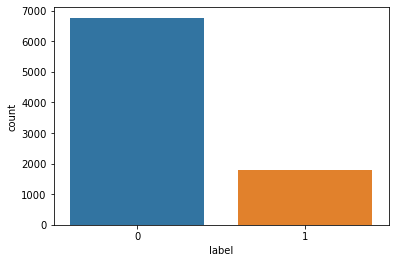

In [197]:
sns.countplot(df.label)

### **Balancing Data**

In [198]:
df[df.label==1]

,text,label
2445,save up to NUMBER on life insurance why spend...,1
2446,NUMBER fight the risk of cancer URL NUMBER sli...,1
2447,NUMBER fight the risk of cancer URL NUMBER sli...,1
2448,adult club offers free membership instant acc...,1
2449,i thought you might like these NUMBER slim dow...,1
...,...,...
8561,Subject: are you ready to get it ? hello ! v...,1
8562,Subject: would you like a $ 250 gas card ? do...,1
8563,"Subject: immediate reply needed dear sir , i...",1
8564,Subject: wanna see me get fisted ? fist bang...,1


In [199]:
#let's balance our data
not_spam=df[df.label==0].sample(1795)


In [200]:
spam = df[df.label==1]

In [201]:
print(not_spam.shape)
print(spam.shape)

(1795, 2)
(1795, 2)


In [202]:
#let's concatenate them 
df = pd.concat([not_spam, spam], ignore_index=True)

In [203]:
df.shape

(3590, 2)

c:\Users\Abu Ubaida\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

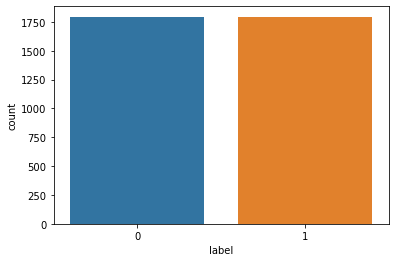

In [204]:
sns.countplot(df.label)

**Why did I balance dataset**
- Actually by upper dataset division my precision Score was about 0, and every prediction was just given straight 0
- After balancing dataset, I got precision score around 55, which is better, but not up to the mark! 

---

# **EDA**

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3590 entries, 0 to 3589
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3589 non-null   object
 1   label   3590 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 56.2+ KB


In [206]:
## let's see missing values
df.isnull().sum()

text     1
label    0
dtype: int64

In [207]:
df = df.dropna()
df.isnull().sum()

text     0
label    0
dtype: int64

In [208]:
# let's see duplicates
df.duplicated().sum()

0

## let's focus on label data


In [209]:
df.label.describe()

count    3589.000000
mean        0.499861
std         0.500070
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: label, dtype: float64

In [210]:
df.label.unique()

array([0, 1], dtype=int64)

In [211]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5693 entries, 123 to 1367
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5693 non-null   object
 1   label   5693 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 111.2+ KB


c:\Users\Abu Ubaida\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


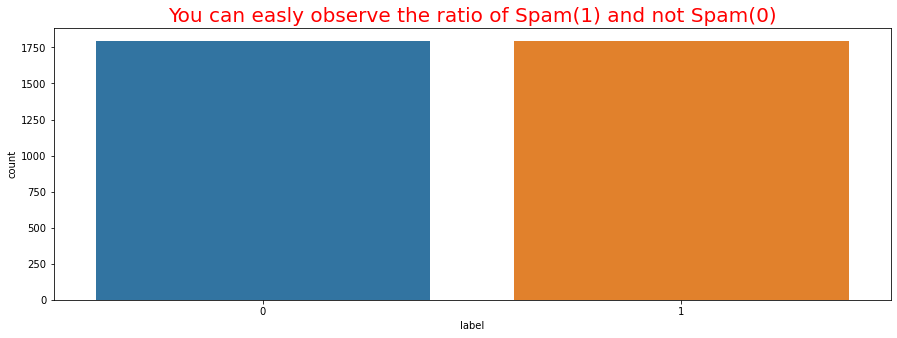

In [212]:
plt.figure(figsize=(15,5))
sns.countplot(df.label)
plt.title("You can easly observe the ratio of Spam(1) and not Spam(0)", size=20, color='r')
plt.show()

## let's focus on Text

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3589 entries, 0 to 3589
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3589 non-null   object
 1   label   3589 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 84.1+ KB


In [214]:
#let's see the total values
df.text.nunique()

3589

In [215]:
#are there duplicated values
df.text.duplicated().sum()

0

In [216]:
df.sample(10)

,text,label
2444,"Subject: sex is a play , and you must win ! y...",1
150,Subject: re : hello vince thank you for the ...,0
2046,這是委託由專業廣告公司代發勿直接回信無法接收 呦 好朋友啊 許多人能力沒有比你好 因為掌握...,1
1879,guaranteed to increase lift and firm your bre...,1
431,"Subject: credit exposure model bill , alex a...",0
141,Subject: re : vince ' s london visit hi wendy...,0
3336,Subject: naturally irresistible your corporate...,1
2174,hyperlink hyperlink hyperlink hyperlink all o...,1
2543,Subject: if you own a cell phone . . . . . . p...,1
1222,Subject: thanks for the interview dear vince ...,0


# **Text Preprocessing**

In [217]:
#let's first convert into lower case
df.text=df.text.str.lower()

- let's see whether we have Html tags or not


In [218]:
import re
def remove(text):
    pattern = re.compile('<.*?>')
    pattern.findall(text)

df.text.apply(remove)

0       None
1       None
2       None
3       None
4       None
        ... 
3585    None
3586    None
3587    None
3588    None
3589    None
Name: text, Length: 3589, dtype: object

- **let's see is there any URL:**


In [219]:
import re
def remove(text):
    pattern = re.compile("https?://\S+|www\.\S+")
    return pattern.search(text) 
df.text.apply(remove)

0       None
1       None
2       None
3       None
4       None
        ... 
3585    None
3586    None
3587    None
3588    None
3589    None
Name: text, Length: 3589, dtype: object

In [220]:
df.sample(5, random_state=1)  ## great we don't have any html tags as well as urls, :)

,text,label
664,subject: software erequests for credit modelin...,0
2518,subject: are you ready to get it ? hello ! v...,1
93,subject: re : enron / stanford program stinso...,0
3332,subject: perfect visual solution for your busi...,1
351,subject: resume for insurance candidate hi vi...,0


In [221]:
#as we can see, actual URLS have been replaced with URL, so it's should be removed
df.text = df.text.apply(lambda x: str(x).replace('URL',""))

In [222]:
df.text = df.text.apply(lambda x: str(x).replace('url',""))

In [223]:
df.sample(5, random_state=1) # we done it.

,text,label
664,subject: software erequests for credit modelin...,0
2518,subject: are you ready to get it ? hello ! v...,1
93,subject: re : enron / stanford program stinso...,0
3332,subject: perfect visual solution for your busi...,1
351,subject: resume for insurance candidate hi vi...,0


- **Let's remove all punctuation**

In [224]:
import string
exclude = string.punctuation

In [225]:
def remove_punctuation(text):
    for i in exclude:
        text = text.replace(i, " ")
    return text

df.text = df.text.apply(remove_punctuation)

- **Let's remove StopWords**

In [226]:
from gensim.parsing.preprocessing import remove_stopwords
df.text = df.text.apply(lambda x: remove_stopwords(x))

In [227]:
df.text[1]

'subject presentation faculty students berkeley charlene coordinate schedule ashley baxter organization responsible recruiting berkeley talked presentation times distribution list presentation scheduled 23 rd october tried combine presentation recruiting trip conflicting schedules vince charlene jackson enron 09 18 2000 02 34 pm vince j kaminski hou ect ect cc subject presentation faculty students berkeley vince presentation scheduled group recruiters road need date coordinate thanks vince j kaminski ect 09 18 2000 01 26 pm steven j kean na enron enron cc charlene jackson corp enron enron celeste roberts hou ect ect vince j kaminski hou ect ect ashley baxter corp enron enron subject presentation faculty students berkeley steve lead recruiter university california berkeley enron analyst associate program contacted friends work berkeley received invitation presentation weekly faculty seminar dept industrial engineering operations research students faculty members business school invited 

- **let's tokenize and lemmatize**

In [228]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

def lemmatizing(text):
    words = word_tokenize(text)
    string = []
    for word in words:
        string.append(wnl.lemmatize(word, pos='v')) ## 'v', handle verb acc to POS verbs.
    return ' '.join(string)

In [229]:
df.text = df.text.apply(lemmatizing)

In [230]:
df.text.head()

0    subject important unite way reminder reminder ...
1    subject presentation faculty students berkeley...
2    subject job description good afternoon job des...
3    subject argentina model michael sorry holiday ...
4    subject organisational announcement introduce ...
Name: text, dtype: object

In [231]:
df.sample(5)

,text,label
3460,subject s small hloy man endow 7 8 hammer simp...,1
2048,high legally work pass drug test extremely pot...,1
486,cvs ed nowadays catch unseen extremely slow la...,0
69,like alias list point nonspamtrap address j nu...,0
1169,subject new email address hello note new email...,0


# **Visualization of Top Words**

- let's see what are the top used word in Spam emails

In [232]:
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=1000, min_font_size=10, background_color = 'white')

In [233]:
spam = wc.generate(df[df.label==1]['text'].str.cat(sep=" "))

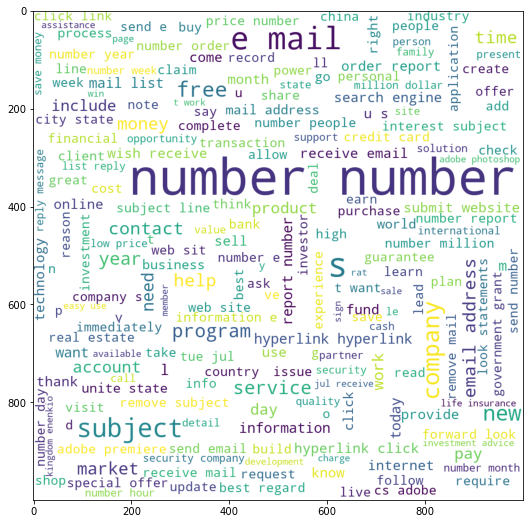

In [234]:
plt.figure(figsize=(15,9))
plt.imshow(spam)

- I think, I should remove some useless words

In [235]:
useless = ['number', 'e mail']
for i in useless:
    df.text = df.text.str.replace(i, '')


In [236]:
spam = wc.generate(df[df.label==1]['text'].str.cat(sep=" "))

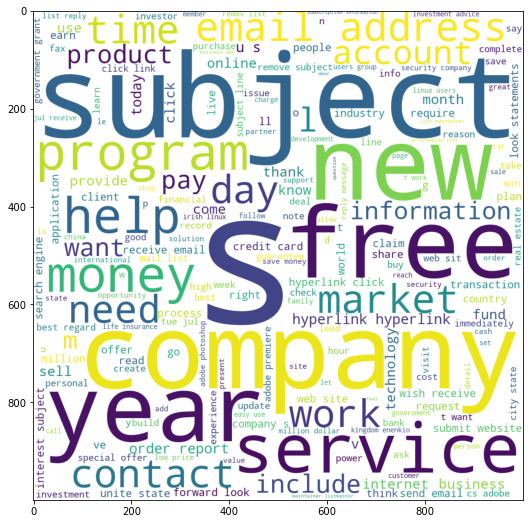

In [237]:
plt.figure(figsize=(15,9))
plt.imshow(spam)

- we can clearly see, these are the words, which lead emails to be spam.

### let's plot word graph for Not_Spam emails

In [238]:
not_spam = wc.generate(df[df.label==0]['text'].str.cat(sep=" "))

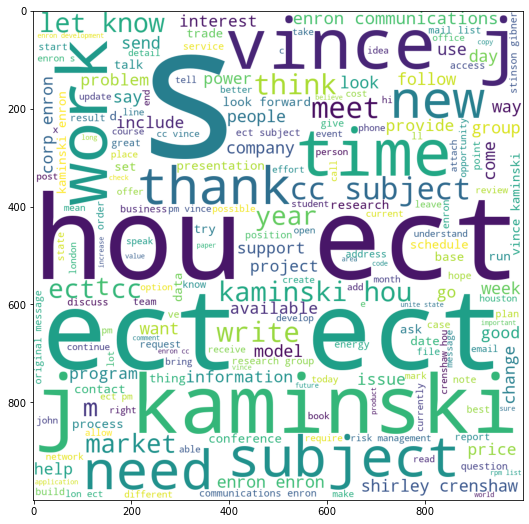

In [239]:
plt.figure(figsize=(15,9))
plt.imshow(not_spam)

- let's remove some unmeaningful words from text

In [240]:
usless = ['ect', 'hou','kaminski', 'enron', 'cc', 'vince', 'crenshaw', ' s ', ' m ', 'stinson gibner', 'subj' ]
for i in usless:
    df.text = df.text.str.replace(i, '')


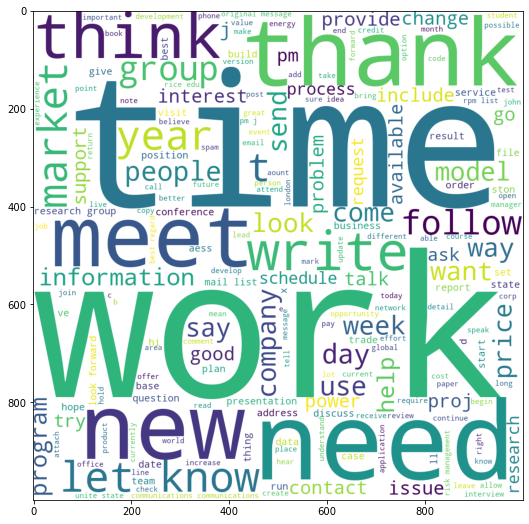

In [241]:
not_spam = wc.generate(df[df.label==0]['text'].str.cat(sep=" "))
plt.figure(figsize=(15,9))
plt.imshow(not_spam)

# **Modelling**

In [242]:
X = df.text
y = df.label

In [243]:
from sklearn.model_selection import train_test_split
X_trian, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

- With 20 % Test size, Test Score was Horrible, After 30% got Slightly different.

# **TF-IDF**

In [244]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
X_train_tfidf = tfidf.fit_transform(X_trian).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

In [245]:
## AS we know Naive_bayes is best for text classification 
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import  confusion_matrix, recall_score, precision_score,accuracy_score, f1_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import KFold, cross_val_score, RepeatedStratifiedKFold, RandomizedSearchCV, GridSearchCV

models = [('GaussianNB',GaussianNB()), ('BernoulliNB',BernoulliNB()), ('MultinomialNB', MultinomialNB()), ('RadomForestClassifier', RandomForestClassifier()),('Decision Tree',DecisionTreeClassifier()), ("KNN",KNeighborsClassifier()),('SVC', SVC()),('LogisticRegression', LogisticRegression()),("Ada Boost Classifier", AdaBoostClassifier()),('ExtraTreesClassifier',ExtraTreesClassifier()),("GradientBoostingClassifier", GradientBoostingClassifier()),('EXboost Classifier', XGBClassifier())]

- **Rough Testing**

In [246]:
Precision_Score = []
Recall_Score = []
Accuracy_Score =[]
models_names = []
F1_score = []

for name, model in models:
    model.fit(X_train_tfidf, y_train)
    y_pred=model.predict(X_test_tfidf)

    models_names.append(name)
    Recall_Score.append(recall_score(y_pred, y_test))
    Precision_Score.append(precision_score(y_pred, y_test))
    Accuracy_Score.append(accuracy_score(y_pred, y_test))
    F1_score.append(f1_score(y_pred, y_test))

dic = {'Algorithms Names':models_names,'Precision Score':Precision_Score, 'Recall Score':Recall_Score, 'F1 Score': F1_score, "Accuracy Score":Accuracy_Score}
dataframe = pd.DataFrame(data=dic)

c:\Users\Abu Ubaida\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:20:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [247]:
dataframe.sort_values(by=['Precision Score', 'Recall Score'], ascending = False)

,Algorithms Names,Precision Score,Recall Score,F1 Score,Accuracy Score
5,KNN,1.000000,0.506404,0.672335,0.534819
9,ExtraTreesClassifier,0.980545,0.949153,0.964593,0.965645
6,SVC,0.976654,0.976654,0.976654,0.977716
3,RadomForestClassifier,0.976654,0.938318,0.957102,0.958217
7,LogisticRegression,0.970817,0.978431,0.974609,0.975859
2,MultinomialNB,0.970817,0.963320,0.967054,0.968431
1,BernoulliNB,0.953307,0.962672,0.957967,0.960074
11,EXboost Classifier,0.951362,0.944015,0.947674,0.949861
10,GradientBoostingClassifier,0.937743,0.946955,0.942326,0.945218
0,GaussianNB,0.920233,0.931102,0.925636,0.929434


## Let's See Over Fitness and Under fitness 

In [248]:
Validation_Score= []
Accuracy_Score =[]
models_names = []
Overfit = []
# Underfit = []

for name, model in models:
    model.fit(X_train_tfidf, y_train)
    y_pred=model.predict(X_train_tfidf)

    models_names.append(name)
    Ac_score = accuracy_score(y_pred, y_train)
    
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    val_score= np.mean(cross_val_score(model, X_train_tfidf, y_train, cv=cv, n_jobs=-1, scoring='accuracy' ))
    
    Overfit.append(['Over-fit' if val_score>Ac_score else 'Not-Overfit'])
    # Underfit.append(['Underfit' if Ac_score == val_score else 'Not Underfit'])
    Accuracy_Score.append(Ac_score)
    Validation_Score.append(val_score)


dic = {'Algorithms Names':models_names,"Accuracy Score":Accuracy_Score, 'Validation Score':Validation_Score, "over fitness": Overfit}
dataframe_train = pd.DataFrame(data=dic)

c:\Users\Abu Ubaida\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:26:19] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [249]:
dataframe_train

,Algorithms Names,Accuracy Score,Validation Score,over fitness
0,GaussianNB,0.995223,0.933255,[Not-Overfit]
1,BernoulliNB,0.959793,0.949177,[Not-Overfit]
2,MultinomialNB,0.982484,0.962715,[Not-Overfit]
3,RadomForestClassifier,1.000000,0.952230,[Not-Overfit]
4,Decision Tree,1.000000,0.880313,[Not-Overfit]
5,KNN,0.597532,0.720535,[Over-fit]
6,SVC,0.999204,0.972664,[Not-Overfit]
7,LogisticRegression,0.989252,0.966562,[Not-Overfit]
8,Ada Boost Classifier,0.941879,0.904458,[Not-Overfit]
9,ExtraTreesClassifier,1.000000,0.959660,[Not-Overfit]


- Results are not up to the mark, but there are some Algorithms which are performing better than other so let's tune them. 
**We know that Naive Bayes is best for textual data. regardless of bad performance I will Tune them as well**

# Tunning of Naive Bayes Algorithms

In [250]:
# will make a new Dataframe of Tunned models
names_of_model = []
Prec_score = []
acc_score = []
rec_score = []
f_score = []

In [251]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB, MultinomialNB
gnb = GaussianNB()
bnb = BernoulliNB()
cnb = ComplementNB()
mnb = MultinomialNB()
logic = LogisticRegression() 


#### **Logistic regression**

In [252]:
#let's tune logistic Regression, cause it is also import for text classification 

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
rand_cv = RandomizedSearchCV(estimator=LogisticRegression(),param_distributions=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [253]:
rand_cv.fit(X_train_tfidf, y_train)

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
                   error_score=0, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   scoring='accuracy')

In [254]:
print(f'Train Accuracy : {rand_cv.best_estimator_.score(X_train_tfidf, y_train):.3f}')
print(f'Test Accuracy : {rand_cv.best_estimator_.score(X_test_tfidf, y_test):.3f}')
print(f'Best Accuracy Through Grid Search :{rand_cv.best_score_:.3f}')
print(f'Best Parameters : ',rand_cv.best_params_)

Train Accuracy : 0.999
Test Accuracy : 0.980
Best Accuracy Through Grid Search :0.973
Best Parameters :  {'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}


In [255]:
logic = LogisticRegression(solver='lbfgs', penalty='l2', C=10) 
logic.fit(X_train_tfidf, y_train)

LogisticRegression(C=10)

In [256]:
y_pred = logic.predict(X_test_tfidf)
print(f'recall_score is = {recall_score(y_pred, y_test)}')
print(f'precision_score is = {precision_score(y_pred, y_test)}')
print(f'accuracy score is = {accuracy_score(y_pred, y_test)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_test)}', end='\n')

recall_score is = 0.9785992217898832
precision_score is = 0.9785992217898832
accuracy score is = 0.9795728876508821
confusion matrix
 [[552  11]
 [ 11 503]]


In [257]:
Prec_score.append(precision_score(y_pred, y_test))
rec_score.append(recall_score(y_pred, y_test))
names_of_model.append('LogisticRegression')
acc_score.append(accuracy_score(y_pred, y_test))
f_score.append(f1_score(y_pred, y_test))


# **BernoulliNB**

In [258]:
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}

bernoulli_nb_grid = GridSearchCV(BernoulliNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
bernoulli_nb_grid.fit(X_train_tfidf,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}, verbose=5)

In [259]:
print(f'Train Accuracy : {bernoulli_nb_grid.best_estimator_.score(X_train_tfidf, y_train):.3f}')
print(f'Test Accuracy : {bernoulli_nb_grid.best_estimator_.score(X_test_tfidf, y_test):.3f}')
print(f'Best Accuracy Through Grid Search :{bernoulli_nb_grid.best_score_:.3f}')
print(f'Best Parameters : ',bernoulli_nb_grid.best_params_)

Train Accuracy : 0.968
Test Accuracy : 0.961
Best Accuracy Through Grid Search :0.951
Best Parameters :  {'alpha': 0.01}


- let's train on these features

In [260]:
bnb = BernoulliNB(alpha=0.01)
bnb.fit(X_train_tfidf, y_train)

BernoulliNB(alpha=0.01)

In [261]:
y_pred = bnb.predict(X_train_tfidf)
print(f'recall_score is = {recall_score(y_pred, y_train)}')
print(f'precision_score is = {precision_score(y_pred, y_train)}')
print(f'accuracy score is = {accuracy_score(y_pred, y_train)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_train)}', end='\n')

recall_score is = 0.9877949552481693
precision_score is = 0.9484375
accuracy score is = 0.9677547770700637
confusion matrix
 [[1217   66]
 [  15 1214]]


In [262]:
y_pred = bnb.predict(X_test_tfidf)
print(f'recall_score is = {recall_score(y_pred, y_test)}')
print(f'precision_score is = {precision_score(y_pred, y_test)}')
print(f'accuracy score is = {accuracy_score(y_pred, y_test)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_test)}', end='\n')

recall_score is = 0.9627450980392157
precision_score is = 0.9552529182879378
accuracy score is = 0.9610027855153204
confusion matrix
 [[544  23]
 [ 19 491]]


In [263]:
Prec_score.append(precision_score(y_pred, y_test))
rec_score.append(recall_score(y_pred, y_test))
names_of_model.append('Bernoulli NB')
acc_score.append(accuracy_score(y_pred, y_test))
f_score.append(f1_score(y_pred, y_test))


# **GaussianNB**

In [264]:
gnb = GaussianNB()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=gnb,param_grid=params_NB,cv=cv,verbose=1,scoring='accuracy') 
gs_NB.fit(X_train_tfidf, y_train)



Fitting 15 folds for each of 100 candidates, totalling 1500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [265]:
print(f'Train Accuracy : {gs_NB.best_estimator_.score(X_train_tfidf, y_train):.3f}')
print(f'Test Accuracy : {gs_NB.best_estimator_.score(X_test_tfidf, y_test):.3f}')
print(f'Best Accuracy Through Grid Search :{gs_NB.best_score_:.3f}')
print(f'Best Parameters : ',gs_NB.best_params_)

Train Accuracy : 0.990
Test Accuracy : 0.942
Best Accuracy Through Grid Search :0.949
Best Parameters :  {'var_smoothing': 0.01}


In [266]:
gnb = GaussianNB(var_smoothing= 0.01)
gnb.fit(X_train_tfidf, y_train)

GaussianNB(var_smoothing=0.01)

In [267]:
y_pred = gnb.predict(X_test_tfidf)
print('Accuracy Score is', accuracy_score(y_pred, y_test))
print(f'precision_score is = {precision_score(y_pred, y_test)}')
print(f'recall score is = {recall_score(y_pred, y_test)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_test)}', end='\n')

Accuracy Score is 0.9424326833797586
precision_score is = 0.9513618677042801
recall score is = 0.9296577946768061
confusion matrix
 [[526  25]
 [ 37 489]]


In [268]:
Prec_score.append(precision_score(y_pred, y_test))
rec_score.append(recall_score(y_pred, y_test))
names_of_model.append('Gaussian NB')
acc_score.append(accuracy_score(y_pred, y_test))
f_score.append(f1_score(y_pred, y_test))


# **Complement NB** 

In [269]:
cnb = ComplementNB()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

params_NB = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}
cnb_NB = GridSearchCV(estimator=cnb,param_grid=params_NB,cv=cv,verbose=1,scoring='accuracy') 
cnb_NB.fit(X_train_tfidf, y_train)



Fitting 15 folds for each of 5 candidates, totalling 75 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=ComplementNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]},
             scoring='accuracy', verbose=1)

In [270]:
print(f'Train Accuracy : {cnb_NB.best_estimator_.score(X_train_tfidf, y_train):.3f}')
print(f'Test Accuracy : {cnb_NB.best_estimator_.score(X_test_tfidf, y_test):.3f}')
print(f'Best Accuracy Through Grid Search :{cnb_NB.best_score_:.3f}')
print(f'Best Parameters : ',cnb_NB.best_params_)

Train Accuracy : 0.986
Test Accuracy : 0.969
Best Accuracy Through Grid Search :0.963
Best Parameters :  {'alpha': 0.1}


In [271]:
cnb = ComplementNB(alpha=1.0)
cnb.fit(X_train_tfidf, y_train)

ComplementNB()

In [272]:
y_pred = cnb.predict(X_test_tfidf)
print('Accuracy Score is', accuracy_score(y_pred, y_test))
print(f'precision_score is = {precision_score(y_pred, y_test)}')
print(f'recall score is = {recall_score(y_pred, y_test)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_test)}', end='\n')

Accuracy Score is 0.9665738161559888
precision_score is = 0.9669260700389105
recall score is = 0.9631782945736435
confusion matrix
 [[544  17]
 [ 19 497]]


In [273]:
Prec_score.append(precision_score(y_pred, y_test))
rec_score.append(recall_score(y_pred, y_test))
names_of_model.append('Complement NB')
acc_score.append(accuracy_score(y_pred, y_test))
f_score.append(f1_score(y_pred, y_test))


# **Multinomial NB**

In [274]:
mnb = MultinomialNB()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

params_NB = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}
mnb_NB = GridSearchCV(estimator=mnb,param_grid=params_NB,cv=cv,verbose=1,scoring='accuracy') 
mnb_NB.fit(X_train_tfidf, y_train)



Fitting 15 folds for each of 5 candidates, totalling 75 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]},
             scoring='accuracy', verbose=1)

In [275]:
print(f'Train Accuracy : {mnb_NB.best_estimator_.score(X_train_tfidf, y_train):.3f}')
print(f'Test Accuracy : {mnb_NB.best_estimator_.score(X_test_tfidf, y_test):.3f}')
print(f'Best Accuracy Through Grid Search :{mnb_NB.best_score_:.3f}')
print(f'Best Parameters : ',mnb_NB.best_params_)

Train Accuracy : 0.988
Test Accuracy : 0.969
Best Accuracy Through Grid Search :0.965
Best Parameters :  {'alpha': 0.1}


In [276]:
mnb = MultinomialNB(alpha=0.5)
mnb.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=0.5)

In [277]:
y_pred = mnb.predict(X_test_tfidf)
print('Accuracy Score is', accuracy_score(y_pred, y_test))
print(f'precision_score is = {precision_score(y_pred, y_test)}')
print(f'recall score is = {recall_score(y_pred, y_test)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_test)}', end='\n')

Accuracy Score is 0.968430826369545
precision_score is = 0.9708171206225681
recall score is = 0.9633204633204633
confusion matrix
 [[544  15]
 [ 19 499]]


In [278]:
Prec_score.append(precision_score(y_pred, y_test))
rec_score.append(recall_score(y_pred, y_test))
names_of_model.append('Multinomial NB')
acc_score.append(accuracy_score(y_pred, y_test))
f_score.append(f1_score(y_pred, y_test))


In [279]:
dic = {'Algorithms':names_of_model, 'Precision Score':Prec_score, 'Recall_Score':rec_score, 'Accuracy Score':acc_score, 'F1_score':f_score}
dataframe_tune = pd.DataFrame(data=dic)

## **Comparison, before tunning and after tunning** 

In [280]:
dataframe_tune.sort_values(by=['Precision Score'], ascending=False)

,Algorithms,Precision Score,Recall_Score,Accuracy Score,F1_score
0,LogisticRegression,0.978599,0.978599,0.979573,0.978599
4,Multinomial NB,0.970817,0.963320,0.968431,0.967054
3,Complement NB,0.966926,0.963178,0.966574,0.965049
1,Bernoulli NB,0.955253,0.962745,0.961003,0.958984
2,Gaussian NB,0.951362,0.929658,0.942433,0.940385


In [281]:
dataframe.sort_values(by=['Precision Score', 'Recall Score'], ascending=False).drop(index=5) # dropping KNN

,Algorithms Names,Precision Score,Recall Score,F1 Score,Accuracy Score
9,ExtraTreesClassifier,0.980545,0.949153,0.964593,0.965645
6,SVC,0.976654,0.976654,0.976654,0.977716
3,RadomForestClassifier,0.976654,0.938318,0.957102,0.958217
7,LogisticRegression,0.970817,0.978431,0.974609,0.975859
2,MultinomialNB,0.970817,0.963320,0.967054,0.968431
1,BernoulliNB,0.953307,0.962672,0.957967,0.960074
11,EXboost Classifier,0.951362,0.944015,0.947674,0.949861
10,GradientBoostingClassifier,0.937743,0.946955,0.942326,0.945218
0,GaussianNB,0.920233,0.931102,0.925636,0.929434
4,Decision Tree,0.912451,0.875000,0.893333,0.896007


## **Extra Tree**

In [282]:
ET = ExtraTreesClassifier(n_estimators=1000 )
ET.fit(X_train_tfidf, y_train)

ExtraTreesClassifier(n_estimators=1000)

In [283]:
y_pred = ET.predict(X_test_tfidf)

print('Accuracy Score is', accuracy_score(y_pred, y_test))
print(f'precision_score is = {precision_score(y_pred, y_test)}')
print(f'recall score is = {recall_score(y_pred, y_test)}')
print(f'F1 Score  = {f1_score(y_pred, y_test)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_test)}', end='\n')

Accuracy Score is 0.9675023212627669
precision_score is = 0.9766536964980544
recall score is = 0.9561904761904761
F1 Score  = 0.9663137632338787
confusion matrix
 [[540  12]
 [ 23 502]]


# **Voting Classifier**


In [284]:
# will make a new Dataframe of voting Classifier
names_of_model_vc = []
Prec_score_vc = []
acc_score_vc = []
rec_score_vc = []
f_score_vc = []

- Combination of ExtraTreesClassifier and RandomForestClassifier

In [285]:
from sklearn.ensemble import VotingClassifier
estimators = [('RandomForestClassifer', RandomForestClassifier()),('ExtraTreesClassifier', ExtraTreesClassifier())]
ext_rand_vc= VotingClassifier(estimators=estimators, n_jobs=-1, verbose=1)

In [286]:
ext_rand_vc.fit(X_train_tfidf, y_train)

VotingClassifier(estimators=[('RandomForestClassifer',
                              RandomForestClassifier()),
                             ('ExtraTreesClassifier', ExtraTreesClassifier())],
                 n_jobs=-1, verbose=1)

In [287]:
y_pred = ext_rand_vc.predict(X_test_tfidf)
print('Accuracy Score is', accuracy_score(y_pred, y_test))
print(f'precision_score is = {precision_score(y_pred, y_test)}')
print(f'recall score is = {recall_score(y_pred, y_test)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_test)}', end='\n')


Accuracy Score is 0.9693593314763231
precision_score is = 0.9727626459143969
recall score is = 0.9633911368015414
confusion matrix
 [[544  14]
 [ 19 500]]


In [288]:
Prec_score_vc.append(precision_score(y_pred, y_test))
rec_score_vc.append(recall_score(y_pred, y_test))
names_of_model_vc.append('Extra Tree & Random Forest')
acc_score_vc.append(accuracy_score(y_pred, y_test))
f_score_vc.append(f1_score(y_pred, y_test))

- Combination of ExtraTreesClassifier and AdaBoostClassifier

In [289]:
from sklearn.ensemble import VotingClassifier
estimators = [('AdaBoostClassifier', AdaBoostClassifier()),('ExtraTreesClassifier', ExtraTreesClassifier())]
ext_ada_vc= VotingClassifier(estimators=estimators, n_jobs=-1, verbose=1)

In [290]:
ext_ada_vc.fit(X_train_tfidf, y_train)

VotingClassifier(estimators=[('AdaBoostClassifier', AdaBoostClassifier()),
                             ('ExtraTreesClassifier', ExtraTreesClassifier())],
                 n_jobs=-1, verbose=1)

In [291]:
y_pred = ext_ada_vc.predict(X_test_tfidf)
print('Accuracy Score is', accuracy_score(y_pred, y_test))
print(f'precision_score is = {precision_score(y_pred, y_test)}')
print(f'recall score is = {recall_score(y_pred, y_test)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_test)}', end='\n')


Accuracy Score is 0.9294336118848654
precision_score is = 0.8754863813229572
recall score is = 0.974025974025974
confusion matrix
 [[551  64]
 [ 12 450]]


In [292]:
Prec_score_vc.append(precision_score(y_pred, y_test))
rec_score_vc.append(recall_score(y_pred, y_test))
names_of_model_vc.append('Extra Tree & Ada boost')
acc_score_vc.append(accuracy_score(y_pred, y_test))
f_score_vc.append(f1_score(y_pred, y_test))

- Combination of Bernoulli, multinomial, and complement 

In [293]:
from sklearn.ensemble import VotingClassifier
estimators = [('bnb',BernoulliNB(alpha=0.01)), ('mnb', MultinomialNB(alpha=0.5)), ('cnb',ComplementNB(alpha=1.0))]
vcNB= VotingClassifier(estimators=estimators, n_jobs=-1, verbose=1)

In [294]:
vcNB.fit(X_train_tfidf, y_train)

y_pred = vcNB.predict(X_test_tfidf)
print('Accuracy Score is', accuracy_score(y_pred, y_test))
print(f'precision_score is = {precision_score(y_pred, y_test)}')
print(f'recall score is = {recall_score(y_pred, y_test)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_test)}', end='\n')

Accuracy Score is 0.9665738161559888
precision_score is = 0.9669260700389105
recall score is = 0.9631782945736435
confusion matrix
 [[544  17]
 [ 19 497]]


In [295]:
Prec_score_vc.append(precision_score(y_pred, y_test))
rec_score_vc.append(recall_score(y_pred, y_test))
names_of_model_vc.append('Bernoulli, multinomial, and complement')
acc_score_vc.append(accuracy_score(y_pred, y_test))
f_score_vc.append(f1_score(y_pred, y_test))

- combination of Gaussian, Bernoulli, and logistic Reg

In [296]:
from sklearn.ensemble import VotingClassifier
estimators = [('gnb',GaussianNB(var_smoothing=0.01873817422860384)), ('bnb',BernoulliNB(alpha=0.01)), ('logic',LogisticRegression(solver='newton-cg', penalty='l2', C=10) )]
vc0 = VotingClassifier(estimators=estimators, n_jobs=-1, verbose=1)

In [297]:
vc0.fit(X_train_tfidf, y_train)

y_pred = vc0.predict(X_test_tfidf)
print('Accuracy Score is', accuracy_score(y_pred, y_test))
print(f'precision_score is = {precision_score(y_pred, y_test)}')
print(f'recall score is = {recall_score(y_pred, y_test)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_test)}', end='\n')

# when data was 20% splitted, overfitted  these were the scores
# This is the score of fist one
# - Accuracy Score is 0.7717454757734968
# - precision_score is = 0.049786628733997154
# - recall score is = 0.2348993288590604
# - confusion matrix
# -   [[2609  668]
# -    [ 114   35]]

# before balancing 
# Accuracy Score is 0.7901342673671921
# precision_score is = 0.07571428571428572
# recall score is = 0.424
# confusion matrix
#  [[2654  647]
#  [  72   53]]

Accuracy Score is 0.9777158774373259
precision_score is = 0.9747081712062257
recall score is = 0.978515625
confusion matrix
 [[552  13]
 [ 11 501]]


In [298]:
Prec_score_vc.append(precision_score(y_pred, y_test))
rec_score_vc.append(recall_score(y_pred, y_test))
names_of_model_vc.append('Bernoulli, Gaussian, and Logistic Reg')
acc_score_vc.append(accuracy_score(y_pred, y_test))
f_score_vc.append(f1_score(y_pred, y_test))

- combination of Bernoulli and LogisticRegression

In [299]:
from sklearn.ensemble import VotingClassifier
estimators = [ ('bnb',BernoulliNB(alpha=0.01)), ('logic',LogisticRegression(solver='newton-cg', penalty='l2', C=10))]
vc1 = VotingClassifier(estimators=estimators, n_jobs=-1, verbose=1)

In [300]:
vc1.fit(X_train_tfidf, y_train)


y_pred = vc1.predict(X_test_tfidf)
print('Accuracy Score is', accuracy_score(y_pred, y_test))
print(f'precision_score is = {precision_score(y_pred, y_test)}')
print(f'recall score is = {recall_score(y_pred, y_test)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_test)}', end='\n')

# when data was 20% splitted, this was the result or when it was overfitted
# Accuracy Score is 0.7772913018096906
# precision_score is = 0.017069701280227598
# recall score is = 0.14285714285714285
# confusion matrix
#  [[2651  691]
#  [  72   12]]

# before balancing 
# Accuracy Score is 0.8012259194395797
# precision_score is = 0.05142857142857143
# recall score is = 0.6792452830188679
# confusion matrix
#  [[2709  664]
#  [  17   36]]


Accuracy Score is 0.9721448467966574
precision_score is = 0.9494163424124513
recall score is = 0.991869918699187
confusion matrix
 [[559  26]
 [  4 488]]


In [301]:
Prec_score_vc.append(precision_score(y_pred, y_test))
rec_score_vc.append(recall_score(y_pred, y_test))
names_of_model_vc.append('Bernoulli, and Logistic Reg')
acc_score_vc.append(accuracy_score(y_pred, y_test))
f_score_vc.append(f1_score(y_pred, y_test))

- combination of GaussianNB and LogisticRegression


In [302]:
from sklearn.ensemble import VotingClassifier
estimators = [('gnb',GaussianNB(var_smoothing=0.01873817422860384)), ('logic',LogisticRegression(solver='newton-cg', penalty='l2', C=10) )]
vc2 = VotingClassifier(estimators=estimators, n_jobs=-1, verbose=1)

In [303]:
vc2.fit(X_train_tfidf, y_train)


y_pred = vc2.predict(X_test_tfidf)
print('Accuracy Score is', accuracy_score(y_pred, y_test))
print(f'precision_score is = {precision_score(y_pred, y_test)}')
print(f'recall score is = {recall_score(y_pred, y_test)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_test)}', end='\n')


# when data was 20% splitted, Unbalanced and overfitted this was the result
# Accuracy Score is 0.7828371278458844
# precision_score is = 0.01991465149359886
# recall score is = 0.2028985507246377
# confusion matrix
#  [[2668  689]
#  [  55   14]]

Accuracy Score is 0.9712163416898792
precision_score is = 0.953307392996109
recall score is = 0.9859154929577465
confusion matrix
 [[556  24]
 [  7 490]]


In [304]:
Prec_score_vc.append(precision_score(y_pred, y_test))
rec_score_vc.append(recall_score(y_pred, y_test))
names_of_model_vc.append('Gaussian and Logistic Reg')
acc_score_vc.append(accuracy_score(y_pred, y_test))
f_score_vc.append(f1_score(y_pred, y_test))

- Combination of GaussianNB and BernoulliNB

In [305]:
from sklearn.ensemble import VotingClassifier
estimators = [('gnb',GaussianNB(var_smoothing=0.01873817422860384)), ('bnb',BernoulliNB(alpha=0.01))]
vc3 = VotingClassifier(estimators=estimators, n_jobs=-1, verbose=1)

In [306]:
vc3.fit(X_train_tfidf, y_train)

y_pred = vc3.predict(X_test_tfidf)
print('Accuracy Score is', accuracy_score(y_pred, y_test))
print(f'precision_score is = {precision_score(y_pred, y_test)}')
print(f'recall score is = {recall_score(y_pred, y_test)}')
print(f'confusion matrix\n {confusion_matrix(y_pred, y_test)}', end='\n')


# when data was 20% splitted, Unbalanced and overfitted this was the result
# Accuracy Score is 0.7831290134267367
# precision_score is = 0.02702702702702703
# recall score is = 0.24358974358974358
# confusion matrix
#  [[2664  684]
#  [  59   19]]

Accuracy Score is 0.9600742804085423
precision_score is = 0.9319066147859922
recall score is = 0.9835728952772074
confusion matrix
 [[555  35]
 [  8 479]]


In [307]:
Prec_score_vc.append(precision_score(y_pred, y_test))
rec_score_vc.append(recall_score(y_pred, y_test))
names_of_model_vc.append('Bernoulli, Gaussian')
acc_score_vc.append(accuracy_score(y_pred, y_test))
f_score_vc.append(f1_score(y_pred, y_test))

In [308]:
dictionary = {'Algorithms':names_of_model_vc, 'Precision Score':Prec_score_vc, 'Recall Score': rec_score_vc, 'F1 Score': f_score_vc, 'Accuracy Score': acc_score_vc}
dataframe_vc = pd.DataFrame(data=dictionary)


# **Finally**
#### *let's see everything*

- Here first I checked the Over fitting of Algorithms

In [309]:
dataframe_train

,Algorithms Names,Accuracy Score,Validation Score,over fitness
0,GaussianNB,0.995223,0.933255,[Not-Overfit]
1,BernoulliNB,0.959793,0.949177,[Not-Overfit]
2,MultinomialNB,0.982484,0.962715,[Not-Overfit]
3,RadomForestClassifier,1.000000,0.952230,[Not-Overfit]
4,Decision Tree,1.000000,0.880313,[Not-Overfit]
5,KNN,0.597532,0.720535,[Over-fit]
6,SVC,0.999204,0.972664,[Not-Overfit]
7,LogisticRegression,0.989252,0.966562,[Not-Overfit]
8,Ada Boost Classifier,0.941879,0.904458,[Not-Overfit]
9,ExtraTreesClassifier,1.000000,0.959660,[Not-Overfit]


- These are the Rough Estimations on Default parameters

In [310]:
dataframe.sort_values(by='Precision Score', ascending=False).drop(index=5) # KNN is overfitted

,Algorithms Names,Precision Score,Recall Score,F1 Score,Accuracy Score
9,ExtraTreesClassifier,0.980545,0.949153,0.964593,0.965645
3,RadomForestClassifier,0.976654,0.938318,0.957102,0.958217
6,SVC,0.976654,0.976654,0.976654,0.977716
2,MultinomialNB,0.970817,0.963320,0.967054,0.968431
7,LogisticRegression,0.970817,0.978431,0.974609,0.975859
1,BernoulliNB,0.953307,0.962672,0.957967,0.960074
11,EXboost Classifier,0.951362,0.944015,0.947674,0.949861
10,GradientBoostingClassifier,0.937743,0.946955,0.942326,0.945218
0,GaussianNB,0.920233,0.931102,0.925636,0.929434
4,Decision Tree,0.912451,0.875000,0.893333,0.896007


- As It is said, Naive Bayes and Logistic Reg are best for text classification. I tuned them for better result, but didn't accomplished

In [311]:
dataframe_tune

,Algorithms,Precision Score,Recall_Score,Accuracy Score,F1_score
0,LogisticRegression,0.978599,0.978599,0.979573,0.978599
1,Bernoulli NB,0.955253,0.962745,0.961003,0.958984
2,Gaussian NB,0.951362,0.929658,0.942433,0.940385
3,Complement NB,0.966926,0.963178,0.966574,0.965049
4,Multinomial NB,0.970817,0.963320,0.968431,0.967054


- Then I tried Voting Classification for getting better result, but overall it was not up to the mark!

In [312]:
dataframe_vc.sort_values(by="Precision Score", ascending=False)

,Algorithms,Precision Score,Recall Score,F1 Score,Accuracy Score
3,"Bernoulli, Gaussian, and Logistic Reg",0.974708,0.978516,0.976608,0.977716
0,Extra Tree & Random Forest,0.972763,0.963391,0.968054,0.969359
2,"Bernoulli, multinomial, and complement",0.966926,0.963178,0.965049,0.966574
5,Gaussian and Logistic Reg,0.953307,0.985915,0.969337,0.971216
4,"Bernoulli, and Logistic Reg",0.949416,0.991870,0.970179,0.972145
6,"Bernoulli, Gaussian",0.931907,0.983573,0.957043,0.960074
1,Extra Tree & Ada boost,0.875486,0.974026,0.922131,0.929434


#### ***After every possible trial, I will use Logistic Regression as my model.***

**Reasons:**
- It has high precision, Recall, and F1-score. 


## **Text Purification Function**

In [313]:
import re
import string 
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.parsing.preprocessing import remove_stopwords
wnl = WordNetLemmatizer()

def purification(text):
    #converting to lower case
    text = text.lower()

    # removing html tags
    pattern_html = re.compile('<.*?>')
    text=pattern_html.sub(" ", text) 

    #removing urls
    pattern_urls = re.compile('https?://\S +|www\.\S+')
    text = pattern_urls.sub(' ', text)

    #removing punctuations
    for i in string.punctuation:
        text = text.replace(i, "")
    
    #rectifying Spelling mistakes
    text = TextBlob(text).correct()

    #lemmatizing text
    words = word_tokenize(str(text)) ###
    lemm_string = []
    for word in words:
        lemm_string.append(wnl.lemmatize(word, pos='v'))
    text =  ' '.join(lemm_string)

    #removing Stop words
    text = remove_stopwords(text) 
    
    return text

### **Testing**

In [328]:
no=df1[df1.label==1].sample().index[0]
text = df1.text[no]
text

' copy any dvd with a cd r burner dvd wizard pro is the most technologically advanced method of dvd reproduction ever available do not be fooled by other fly by night websites offering outdated information our package will show you how to backup any dvd or vhs cassette using a cd r burner we will go further and show you how to backup a dvd using a dvd r or dvd rw burner as well make quality backups of your personal dvd s and vhs cassettes create your own dvd library never worry about scratching or losing a dvd again dvd wizard pro is completely unlike anything our competitors are offering and it s fully guaranteed hyperlink order today you won t be disappointed limited time only NUMBER NUMBER we have sold this package for as much as NUMBER NUMBER but now for a very limited time only we are offering instant access for only NUMBER NUMBER hyperlink go here and order a copy today your email address was obtained from an opt in list opt in mrsa list purchase code NUMBER NUMBER NUMBER if you 

In [329]:
text = purification(text)
text

'copy d r burn wizard pro technological advance method reproduction available fool fly night webster offer outdated information package vs cassette use d r burn use r burn quality personal s vs cassette create library worry scratch lose wizard pro completely unlike competitors offer s fully guarantee hyperlink order today win t disappoint limit time number number sell package number number limit time offer instant access number number hyperlink order copy today email address obtain opt list opt mrs list purchase code number number number wish subscribe list hyperlink click press send remove previously subscribe receive message email hyperlink spasm abuse control center london spasm shape form thank kindly cooperation'

In [330]:
text = tfidf.transform([text]).toarray()

value =logic.predict(text)[0]
if value!=0:
    print('Spam = 1')
else:
    print("Not Spam = 0")

Spam = 1


## ***Deployment***

In [331]:
import pickle
pickle.dump(purification, open("purification.pkl", 'wb'))
pickle.dump(tfidf, open('transformer.pkl', 'wb'))
pickle.dump(logic, open("model.pkl", 'wb'))